# Exploratory Data Analysis (EDA)
Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 
EDA in Python uses data visualization to draw meaningful patterns and insights. It also involves the preparation of data sets for analysis by removing **irregularities** in the data.

In [9]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# pip install seaborn --upgrade

In [11]:
## conda install -c conda-forge mlxtend

In [12]:
# setting up default plotting parameters
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20.0, 9.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis') 
sns.set_style('darkgrid') 
sns.set_context('talk', font_scale=0.8)

## Loading the Dataset

In [154]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [22]:
train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


In [23]:
test_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15642544,Henderson,723,France,Male,34,5,0.00,2,0,1,12092.03
1,15779492,Trevisano,796,Spain,Male,56,6,94231.13,1,0,0,121164.60
2,15815271,Ritchie,755,Germany,Male,43,6,165048.50,3,1,0,16929.41
3,15582591,Chiabuotu,615,Spain,Male,59,4,155766.05,1,1,1,110275.17
4,15595937,Bruno,430,Germany,Male,36,1,138992.48,2,0,0,122373.42


### Viewing the number of rows and culumns in the data sets

In [24]:
test_data.shape

(3000, 12)

In [26]:
train_data.shape

(7000, 13)

In [123]:
train_data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
#Summing the missing values in the train data
train_data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
#Summing the missing values in the test data
test_data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

There are no missing values(Null/NaN) in the datasets

## Encoding the non-numeric variables
Here, i will be converting variables of labels with non-numeric values to numerical value.
> Machine learning models can only work with numeric data

Machine learning models work very well for dataset having only numbers. But how do we handle text information in dataset? Simple approach is to use interger or label encoding but when categorical variables are nominal, using simple label encoding can be problematic. One hot encoding is the technique that can help in this situation. 
> Since we are dealing with nominal variable(variables with no particulare odering of which is greater or less than the other), i will use One hot encoding. 

In [155]:
# For hot encoding, we will need to create dummy variables
dummies = pd.get_dummies(train_data.Gender)
dummies

,Female,Male
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
6995,0,1
6996,1,0
6997,0,1
6998,1,0


In [156]:
dummies2 = pd.get_dummies(train_data.Geography)
dummies2

,France,Germany,Spain
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
6995,1,0,0
6996,1,0,0
6997,1,0,0
6998,1,0,0


In [157]:
merged = pd.concat([train_data, dummies, dummies2], axis='columns')
merged

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0,1,0,1,0,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0,0,1,1,0,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0,1,0,1,0,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0,0,1,0,0,1
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,15628999,Townsend,732,France,Male,79,10,61811.23,1,1,1,104222.80,0,0,1,1,0,0
6996,15661708,She,508,France,Female,41,5,0.00,2,1,1,94170.84,0,1,0,1,0,0
6997,15593900,Belousov,705,France,Male,38,1,189443.72,1,0,1,106648.58,0,0,1,1,0,0
6998,15570087,Parry-Okeden,664,France,Female,44,8,142989.69,1,1,1,115452.51,1,1,0,1,0,0


In [14]:
# Encoding the categorical variables
#from sklearn import preprocessing
#creating label encoader
#le = preprocessing.LabelEncoder()

In [15]:
#converting string lables into numbers
#train_data['Geography']=le.fit_transform(train_data['Geography'])
#train_data['Gender']=le.fit_transform(train_data['Gender'])
#test_data['Geography']=le.fit_transform(test_data['Geography'])
#test_data['Gender']=le.fit_transform(test_data['Gender'])

## Features Selection

In [158]:
merged.drop(['Surname', 'CustomerId', 'Geography', 'Gender'], axis = 1, inplace=True)

In [159]:
features = merged[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary', 'Female', 'Male', 'France', 'Germany', 'Spain']]
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
0,601,41,1,0.00,2,0,1,160607.06,1,0,1,0,0
1,576,39,1,0.00,2,1,1,68814.23,0,1,1,0,0
2,728,69,1,0.00,2,1,1,131804.86,1,0,1,0,0
3,640,39,3,0.00,1,1,1,105997.25,0,1,0,0,1
4,768,37,9,108308.11,1,1,0,41788.25,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,732,79,10,61811.23,1,1,1,104222.80,0,1,1,0,0
6996,508,41,5,0.00,2,1,1,94170.84,1,0,1,0,0
6997,705,38,1,189443.72,1,0,1,106648.58,0,1,1,0,0
6998,664,44,8,142989.69,1,1,1,115452.51,1,0,1,0,0


In [160]:
target = train_data['Exited']

# Identifying Outliers
Outliers are unusual data points that differ significantly from rest of the samples. They can occur due to an error in data collection process or they are just legitimate data points and represent natural variation.
> Outliers are **irregularities**, which cause **overfiting** in the prediction with a dataset where they appear.

### ways of identifying oultliers by: 
- Analysing statistical summary
 - **Pecentile approach**
 - **IQR**
 - **Z Score** or **standard deviation**
- Data visualization
 - **histogram**, **box plots**, **scatter plots**, **residual values**, and **Cook’s distance**.

In [6]:
# Getting the summary statistics of the data
train_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1.569078e+07,649.424000,38.932857,5.008143,77006.866360,1.525857,0.709286,0.514429,99783.685516,0.201429
std,7.191100e+04,97.478815,10.467815,2.891734,62392.609703,0.582318,0.454124,0.499827,57358.455381,0.401096
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.562847e+07,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50957.302500,0.000000
50%,1.569053e+07,651.000000,37.000000,5.000000,97529.180000,1.000000,1.000000,1.000000,99594.475000,0.000000
75%,1.575333e+07,716.000000,44.000000,7.000000,127942.495000,2.000000,1.000000,1.000000,149462.720000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199953.330000,1.000000


From the statistical summary, we can see that:
   > - The minimum vale for EstimatedSalary is 90.07 which is considerably less than the rest of the values. this depicts the possiblity of outliers present in this label of the dataset 
   > - Also we can see that the maximum age is 92, which considerably higher than the majority. Alhough it is realistict to have a 92 year old customer, because they are far off from the rest of the data, it can skew the prediction and decrease accuracy.

**EstimatedSalary Outliers**

In [46]:
# Possible EstimatedSalary Outliers using percentile
min_thresold, max_thresold = features.EstimatedSalary.quantile([0.001, 0.999])
min_thresold, max_thresold


(287.88020000000006, 199727.75357000003)

In [19]:
features[features.EstimatedSalary < min_thresold]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1326,718,0,1,37,8,0.00,2,1,1,142.81
3116,625,0,1,31,5,0.00,2,0,1,90.07
3764,811,0,0,35,7,0.00,1,1,1,178.19
4483,629,0,1,40,9,0.00,1,1,0,106.67
4676,708,0,1,52,10,105355.81,1,1,0,123.07
5900,621,0,1,35,7,87619.29,1,1,0,143.34
5990,710,0,1,38,2,0.00,2,1,0,96.27


# DELETE

In [57]:
# Possible EstimatedSalary Outliers using standard deviation
features.EstimatedSalary.mean()

99783.68551571414

In [75]:
features.EstimatedSalary.std()

57358.45538117832

In [70]:
upper_limit = features.EstimatedSalary.mean()+features.EstimatedSalary.std()
upper_limit

157142.14089689247

In [72]:
lower_limit = features.EstimatedSalary.mean()-features.EstimatedSalary.std()
lower_limit

42425.23013453582

In [73]:
features[(features.EstimatedSalary>upper_limit) | (features.EstimatedSalary<lower_limit)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,601,0,0,41,1,0.00,2,0,1,160607.06
4,768,1,1,37,9,108308.11,1,1,0,41788.25
5,699,1,1,59,3,106819.65,1,0,1,163570.25
6,739,0,1,42,2,141642.92,2,1,0,172149.76
8,679,0,1,37,7,74260.03,1,1,0,194617.98
...,...,...,...,...,...,...,...,...,...,...
6989,667,1,1,32,0,103846.65,1,1,0,20560.69
6990,661,1,1,44,1,141136.62,1,1,0,189742.78
6992,582,1,1,41,6,70349.48,2,0,1,178074.04
6993,626,0,0,29,4,105767.28,2,0,0,41104.82


z = x-u/6,  where u=mean and 6=standard deviation

In [74]:
features['zscore'] = (features.EstimatedSalary - features.EstimatedSalary.mean())/features.EstimatedSalary.std()
features.head(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,zscore
0,601,0,0,41,1,0.00,2,0,1,160607.06,1.060408
1,576,0,1,39,1,0.00,2,1,1,68814.23,-0.539928
2,728,0,0,69,1,0.00,2,1,1,131804.86,0.558264
3,640,2,1,39,3,0.00,1,1,1,105997.25,0.108329
4,768,1,1,37,9,108308.11,1,1,0,41788.25,-1.011105


In [88]:
features[features['zscore']<-1.73]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,zscore
1326,718,0,1,37,8,0.00,2,1,1,142.81,-1.737161
1451,571,0,1,49,4,180614.04,1,0,0,523.00,-1.730533
2282,520,1,1,34,8,120018.86,2,1,1,343.38,-1.733664
2949,530,0,1,37,8,0.00,2,1,1,287.99,-1.734630
3080,766,0,0,26,3,104258.80,1,1,1,428.23,-1.732185
3116,625,0,1,31,5,0.00,2,0,1,90.07,-1.738081
3124,751,2,0,34,8,127095.14,2,0,0,479.54,-1.731290
3764,811,0,0,35,7,0.00,1,1,1,178.19,-1.736544
3943,663,0,1,26,5,141462.13,1,1,0,440.20,-1.731976
4483,629,0,1,40,9,0.00,1,1,0,106.67,-1.737791


In [91]:
#IQR
Q1=features.EstimatedSalary.quantile(0.25)
Q3=features.EstimatedSalary.quantile(0.75)
Q1, Q3

(50957.3025, 149462.72000000003)

In [94]:
IQR = Q3 - Q1
IQR

98505.41750000004

In [121]:
lower_limit = Q1 - 1.51*IQR
upper_limit = Q1 + 1.51*IQR
lower_limit, upper_limit

(-97785.87792500007, 199700.48292500005)

In [122]:
features[(features.EstimatedSalary>upper_limit) | (features.EstimatedSalary<lower_limit)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,zscore
1240,524,1,0,31,8,107818.63,1,1,0,199725.39,1.742406
1323,850,0,0,29,10,0.00,2,1,1,199775.67,1.743282
2049,845,1,0,41,2,81733.74,2,0,0,199761.29,1.743032
2575,719,0,1,36,3,155423.17,1,1,1,199841.32,1.744427
2911,501,1,0,34,7,93244.42,1,0,1,199805.63,1.743805
3002,620,0,1,28,8,0.00,2,1,1,199909.32,1.745612
5906,569,0,1,37,9,178755.84,1,1,0,199929.17,1.745959
6361,757,0,1,28,3,75381.15,1,1,1,199727.72,1.742446
6881,608,2,1,27,4,153325.10,1,1,1,199953.33,1.746380


# Stop Delete

**Age Outliers**

In [123]:
# Possible Age Outliers Using Percentile
min_thresold3, max_thresold3 = features.Age.quantile([0.001, 0.999])
min_thresold3, max_thresold3

(18.0, 81.00100000000111)

In [35]:
features[features.Age > max_thresold3]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
431,700,0,0,82,2,0.00,2,0,1,182055.36
437,513,2,1,88,10,0.00,2,1,1,52952.24
3151,678,1,1,83,6,123356.63,1,0,1,92934.41
3220,408,0,0,84,8,87873.39,1,0,0,188484.52
4444,705,0,1,92,1,126076.24,2,1,1,34436.83
4619,787,0,0,85,10,0.00,2,1,1,116537.96
5076,753,0,1,92,3,121513.31,1,0,1,195563.99


## Removing Outliers

### Identifying the important features in my data set to aid with further analysis 

[0.13213974 0.04395274 0.01674382 0.2398535  0.10517611 0.12378895
 0.14303612 0.02332188 0.04247007 0.12951708]


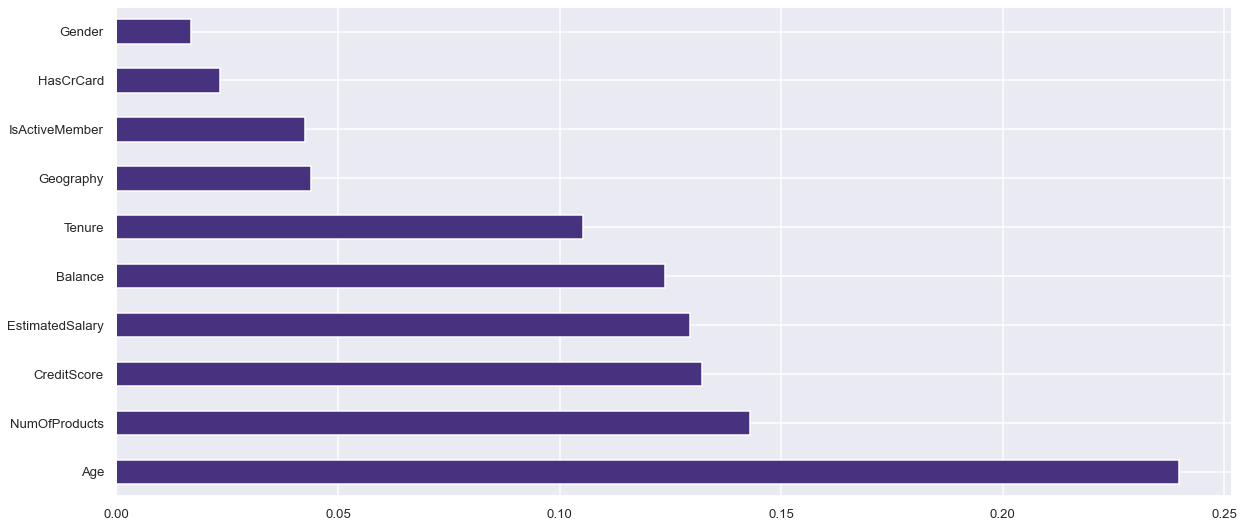

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features, target)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=features.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

The Diagram above shows each of the features and their level of importance using an extra tree classifier model

[2.69493274e-02 3.36770127e-02 1.41348540e-02 3.96378637e-01
 1.78876408e-03 6.03278877e-02 3.00381561e-01 3.07500064e-05
 1.40881710e-01 2.54494958e-02]


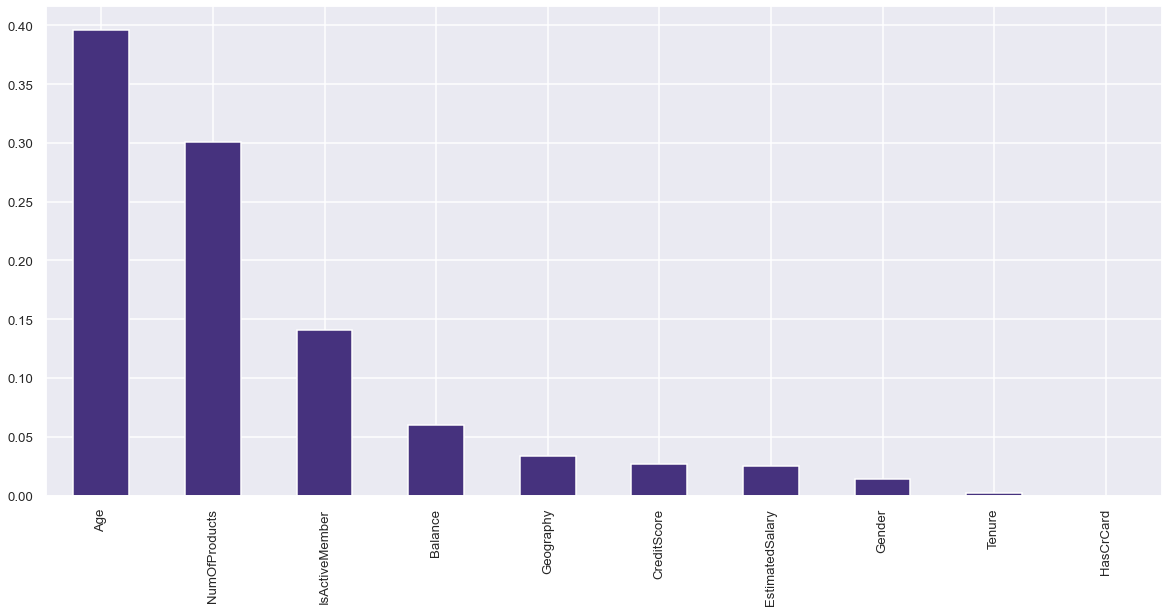

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(features, target)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=features.columns)
feat_importance.nlargest(10).plot(kind = 'bar')
plt.show()

The Diagram above shows each of the features and their level of importance using an Gradient Boosting classifier model

[0.14401164 0.03620535 0.01938532 0.24306295 0.0788678  0.13525939
 0.13140971 0.01834332 0.04824505 0.14520947]


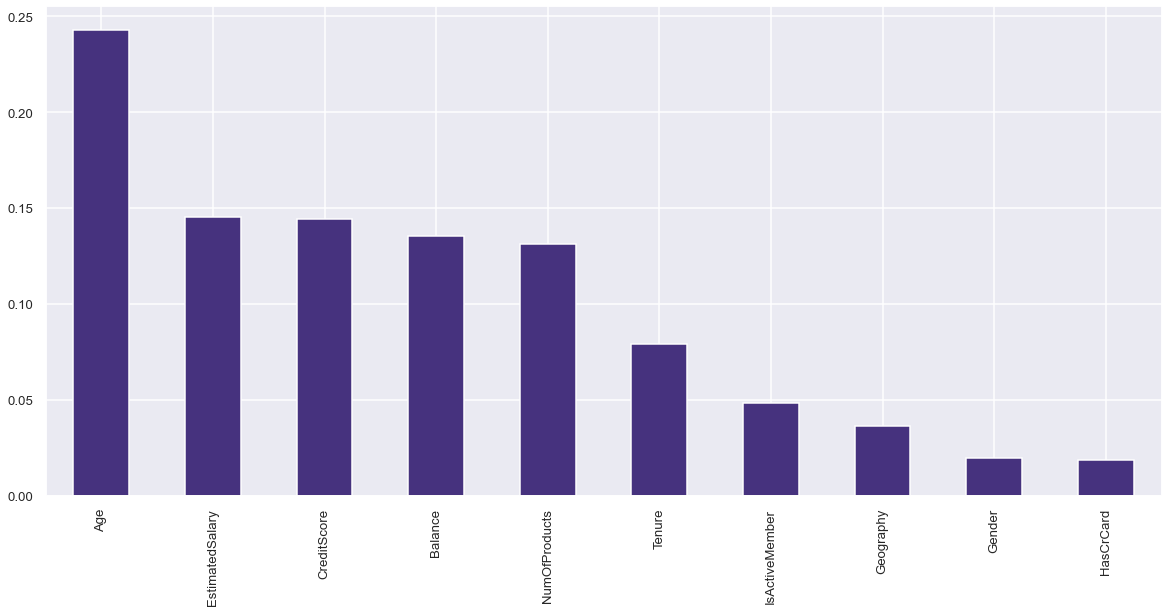

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(features, target)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=features.columns)
feat_importance.nlargest(10).plot(kind = 'bar')
plt.show()

The Diagram above shows each of the features and their level of importance using an Random Forest classifier model

## Histogram 
A histogram is a common plot to visualize the distribution of a numerical variable. In a histogram, the data is split into intervals also called bins. 
>Each bar’s height represents the frequency of data points within each feature.

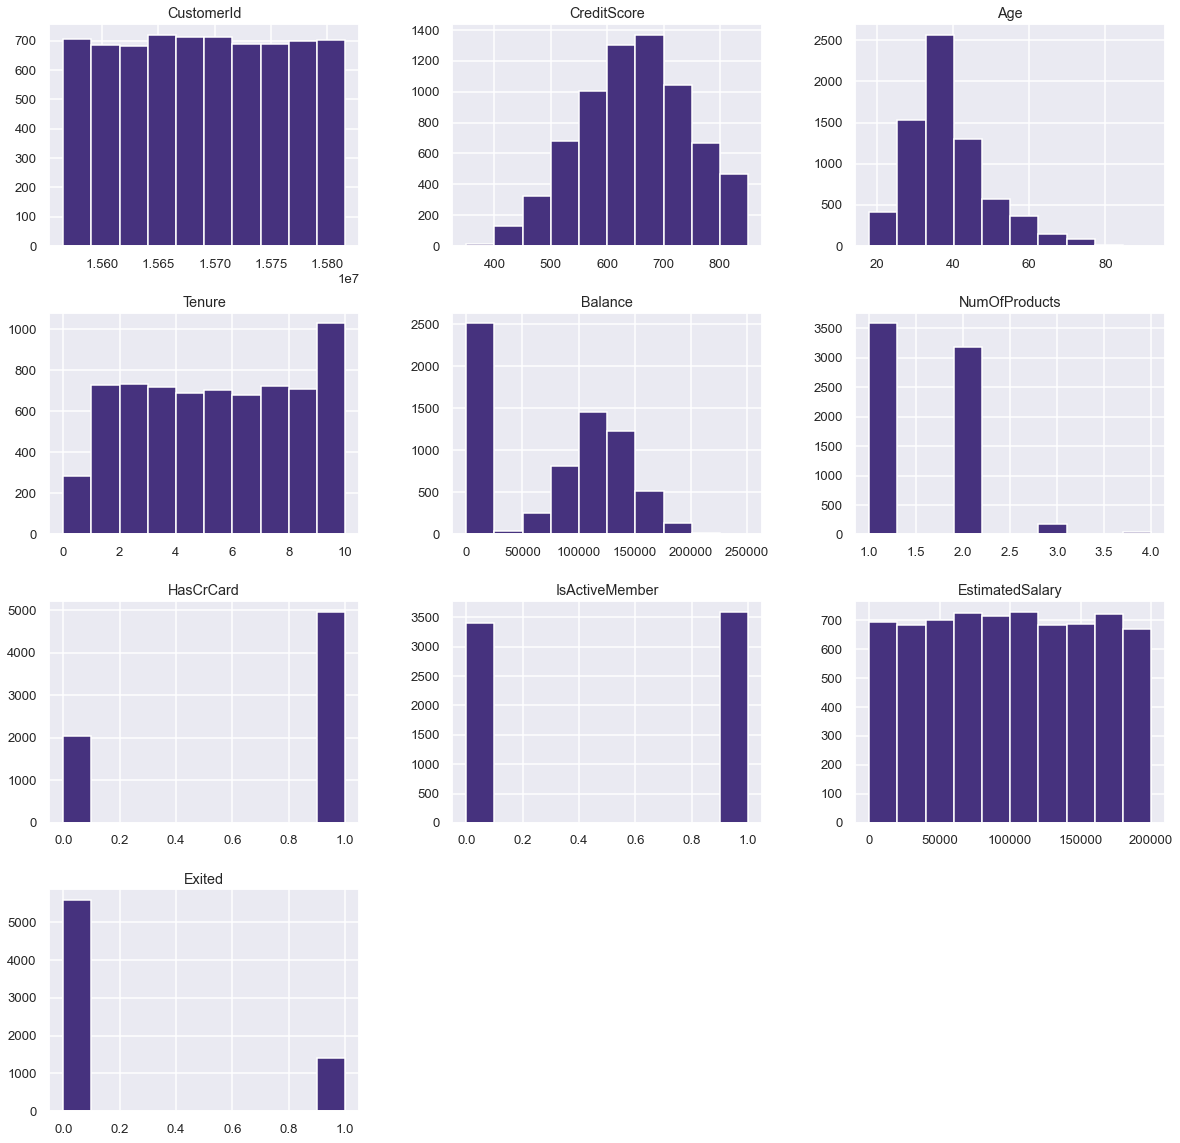

In [7]:
train_data.hist(figsize=(20,20))
plt.show()

From the histogram, we can tell that the possible outliers are those considerably lower than the rest of the values.

From the Histogram representing The features Balance, we can see that about 2500 customers have a balance of 0 

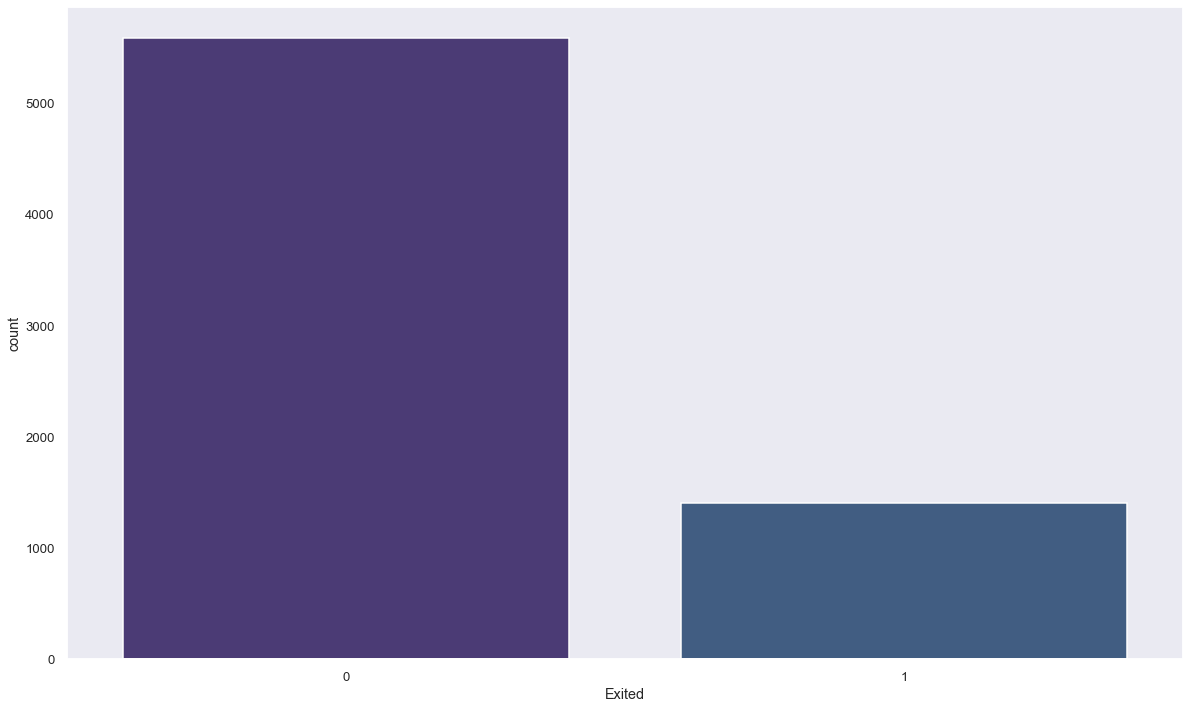

In [40]:
sns.countplot( x = 'Exited' , data = train_data)
plt.show()

## Box plot
Box plots visually show the **distribution** of numerical data and **skewness** through displaying the data **quartiles** (or percentiles) and averages.

<AxesSubplot:xlabel='Exited', ylabel='Age'>

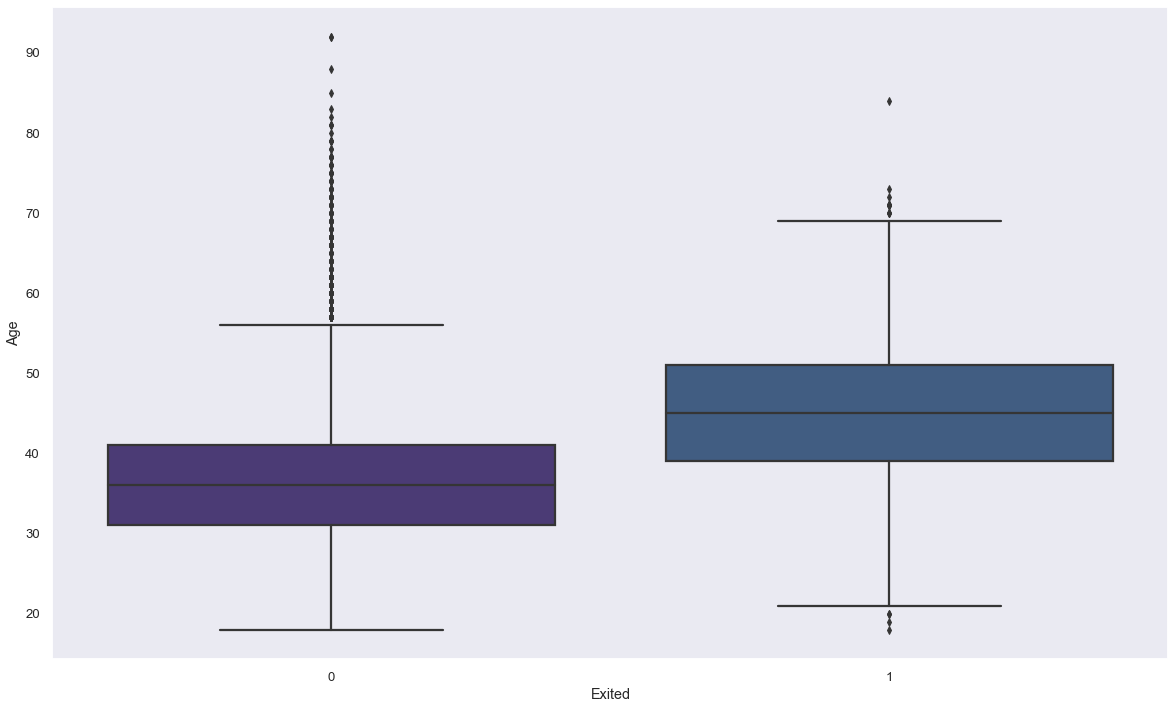

In [41]:
# box plot of the variable Age
sns.boxplot(x = 'Exited', y = 'Age', data = train_data)

## Scatter Plot
A scatter plot (scatter chart, scatter graph) uses **dots** to represent values for **two** different numeric variables, on the X and Y coordinates of a Cartesian plane.

Text(0.5, 1.0, 'Distribution of ages')

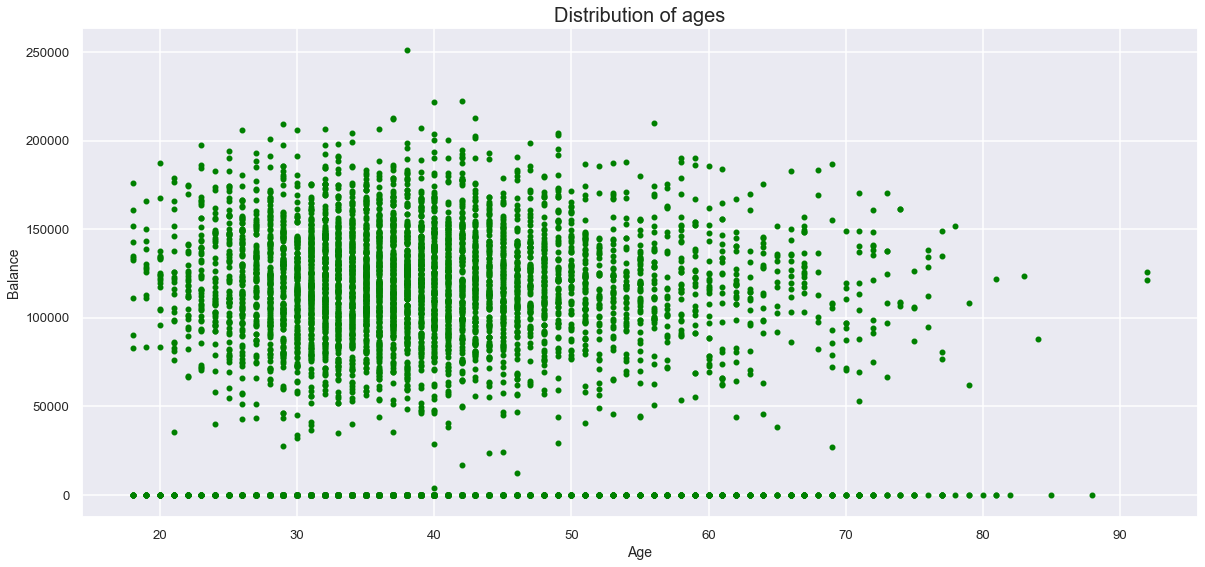

In [45]:
# scatterplotting the Customers to see the outliers

import matplotlib.pyplot as plt
train_data.plot(kind='scatter', x='Age', y='Balance', alpha=1, color='green')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Balance', fontsize=14)
plt.title('Distribution of ages', fontsize=20)

## Correlation

correlation is any statistical relationship, whether causal or not, between two random variables. We can plot correlation matrix to show which variable is having a high or low correlation in respect to another variable.
> It is important to note that correlation coefficients only measure linear correlations.

In [130]:
train_data.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.008499,0.009929,-0.018993,-0.021439,0.011442,-0.019029,-0.011828,0.032816,-0.007060
CreditScore,0.008499,1.000000,-0.002511,-0.006013,0.002181,0.008048,-0.008505,0.026724,-0.007756,-0.032201
Age,0.009929,-0.002511,1.000000,0.001982,0.019424,-0.030046,-0.014927,0.085195,0.009270,0.288732
Tenure,-0.018993,-0.006013,0.001982,1.000000,0.001221,-0.003052,0.025304,-0.025239,0.007210,-0.009668
Balance,-0.021439,0.002181,0.019424,0.001221,1.000000,-0.303379,-0.009317,-0.010813,0.018277,0.111493
NumOfProducts,0.011442,0.008048,-0.030046,-0.003052,-0.303379,1.000000,0.009249,0.008045,0.015463,-0.040043
HasCrCard,-0.019029,-0.008505,-0.014927,0.025304,-0.009317,0.009249,1.000000,-0.020230,-0.010966,-0.008701
IsActiveMember,-0.011828,0.026724,0.085195,-0.025239,-0.010813,0.008045,-0.020230,1.000000,-0.018574,-0.167725
EstimatedSalary,0.032816,-0.007756,0.009270,0.007210,0.018277,0.015463,-0.010966,-0.018574,1.000000,0.016426
Exited,-0.007060,-0.032201,0.288732,-0.009668,0.111493,-0.040043,-0.008701,-0.167725,0.016426,1.000000


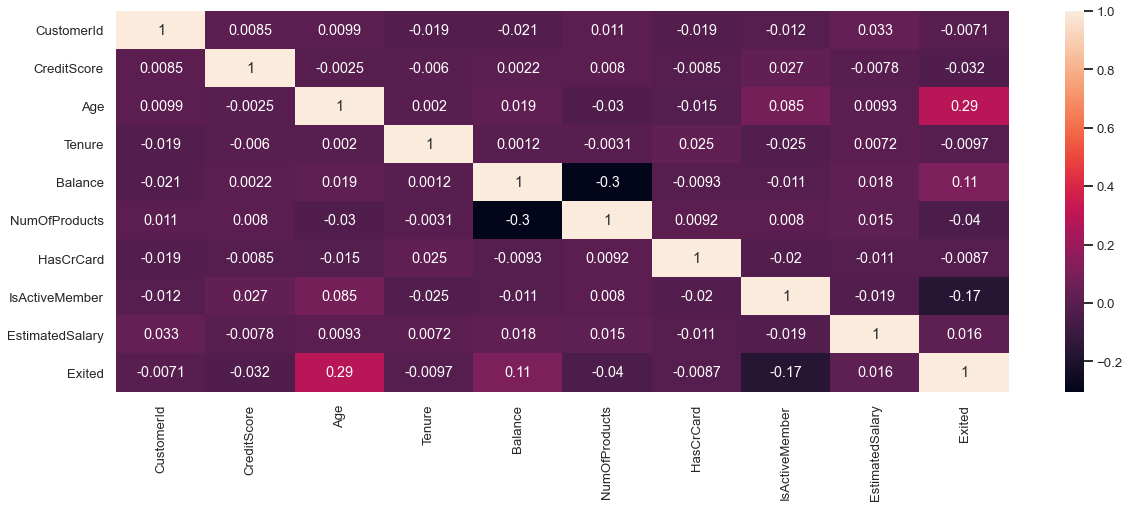

In [131]:
sns.heatmap(train_data.corr(), annot=True)
plt.show()

## Pearson Correlation of Features

 Pearson's Correlation method is used for finding the association between the continuous features and the class feature. 
>It is also used for finding the feature- feature correlation to remove redundant feature.

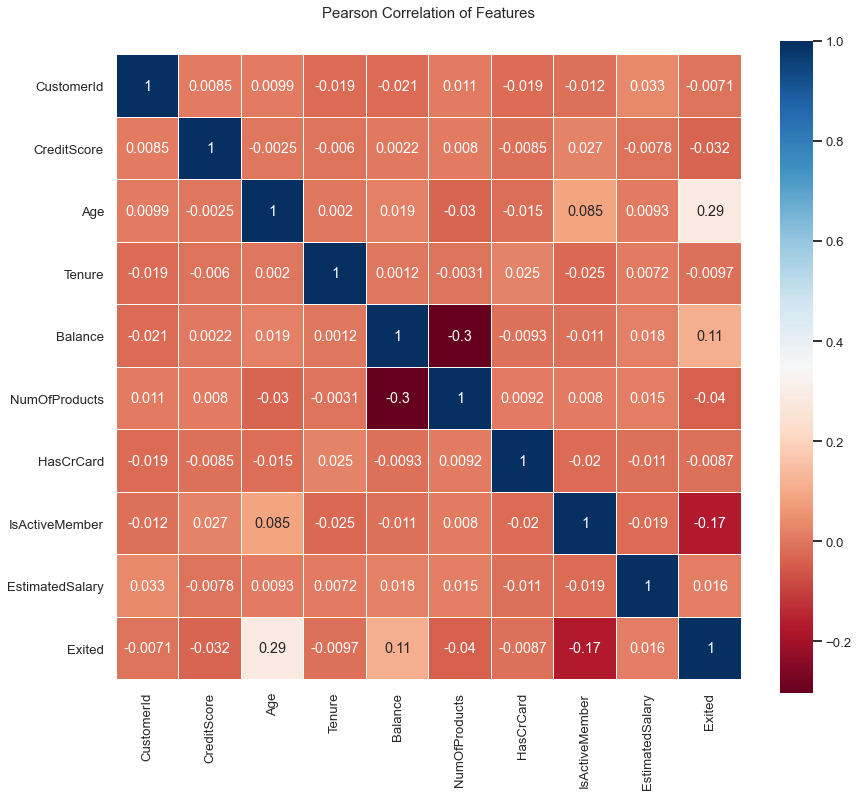

In [132]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

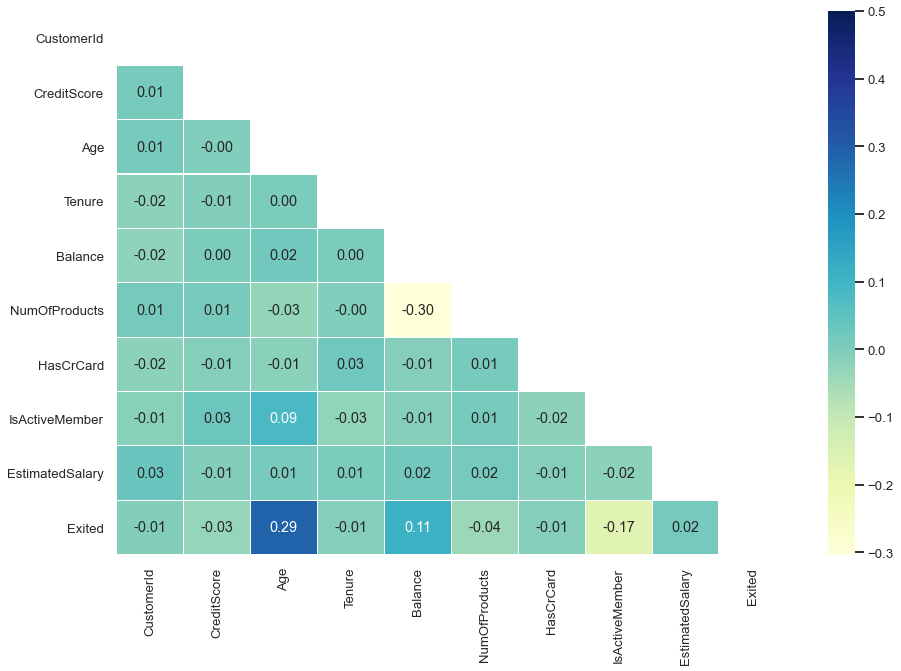

In [133]:
# To Calculate correlations
corr = train_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap Representation
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
             annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")
plt.show()

In [134]:
# Find correlations with the target and sort
correlations = train_data.corr()['Exited'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 CustomerId        -0.007060
EstimatedSalary    0.016426
Balance            0.111493
Age                0.288732
Exited             1.000000
Name: Exited, dtype: float64

Most Negative Correlations: 
 IsActiveMember   -0.167725
NumOfProducts    -0.040043
CreditScore      -0.032201
Tenure           -0.009668
HasCrCard        -0.008701
Name: Exited, dtype: float64


## EDA Concluding Remarks

Let's summarise the findings from this EDA: <br>

> - The dataset has all features in their correct data type. <br>
- The strongest positive correlations with the target features are: **Customer_Id**, **EstimatedSalary**, **Balance**, **Age**. 
- The strongest negative correlations with the target features are: **IsActiveMember**, **NumOfProducts**, **CreditScore**, **Tenure**, and **HasCrCard** .
- The dataset is **imbalanced** with the majoriy of observations describing unpromoted employees. <br>
- Several features (ie columns) are not applicable for our analysis, namely: Exited, Surname, CustomerId, Gender. <br>

Other observations include: <br>

# Training Features for the model

In [108]:
# drop target and unecessary columns/labels from train data and assign to Train features for training the model
train_features = train_data.drop(['Exited', 'Surname', 'CustomerId', 'CreditScore', 'IsActiveMember'], axis = 1) # in python, Row 0 column 1 for axis
train_features

,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
0,France,41,1,0.00,2,0,160607.06
1,France,39,1,0.00,2,1,68814.23
2,France,69,1,0.00,2,1,131804.86
3,Spain,39,3,0.00,1,1,105997.25
4,Germany,37,9,108308.11,1,1,41788.25
...,...,...,...,...,...,...,...
6995,France,79,10,61811.23,1,1,104222.80
6996,France,41,5,0.00,2,1,94170.84
6997,France,38,1,189443.72,1,0,106648.58
6998,France,44,8,142989.69,1,1,115452.51


In [68]:
train_target = train_data['Exited']

In [92]:
# Assigning Customer Id to a variable to use as a unique identifier
CustomerId = test_data['CustomerId']

In [109]:
# drop target and unecessary columns from test data and assign to features
test_features = test_data.drop(['Surname', 'CustomerId', 'CreditScore', 'IsActiveMember'], axis = 1)
test_features

,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
0,France,34,5,0.00,2,0,12092.03
1,Spain,56,6,94231.13,1,0,121164.60
2,Germany,43,6,165048.50,3,1,16929.41
3,Spain,59,4,155766.05,1,1,110275.17
4,Germany,36,1,138992.48,2,0,122373.42
...,...,...,...,...,...,...,...
2995,Germany,45,4,110765.68,1,1,26163.74
2996,Germany,26,3,119545.48,2,1,65482.94
2997,France,39,1,129068.54,2,1,187905.12
2998,Germany,41,10,122189.66,2,1,98301.61


## Building Machine Learning Models

We are going to be building different models with different machine learning algorithms, and them comparing them to see which one works best. We are going to be building our models with the following algorithms.
- Decision Trees Classifier (Tree)
- Logistic Regression (Linear-model)
- Support Vector Machine (SVM)
- Random Forest Classifier (ensemble)
- Gradient Boosting Classifier (ensemble)
- BaggingClassifier(ensemble)
- KNeighbour (neighbors)
- KNearestNeighbour (neighbors)
- Extra Trees Classifier (ensemble)
- Guassin Naive Bayes Model (naive_bayes)
- AdaBooster Classifier (ensemble)

#### For Combining Models
>- StackingCV Classifier (mlxtend.classifier)
>- Voting Classifier (ensemble)</br>



# Decision Tree Model
Decision tree algorithm is a type of non-linear classification model, where data points pass through a tree-like process in order to predict an output variable.

In [141]:
#Fitting the Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [162]:
# Using the Decision tree classifier to create a model
classifier1 = DecisionTreeClassifier()
# model = classifier1.fit(train_features, train_target)

In [143]:
#Using the model to make a Prediction
target_pred1 = model.predict(test_features)

In [144]:
prediction1 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred1})

In [145]:
prediction1.to_csv('initial_prediction.csv', index = False) 

## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In [146]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
model = classifier2.fit(train_features, train_target)

In [147]:
target_pred2 = model.predict(test_features)

In [148]:
prediction2 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred2})

In [149]:
prediction2.to_csv('prediction2.csv', index = False) 

## Support vector machine
support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.

In [163]:
from sklearn.svm import SVC
classifier3 = SVC(kernel='poly', random_state=0) #support vector model 
model = classifier3.fit(train_features, train_target)

In [38]:
target_pred3 = model.predict(test_features)

In [39]:
prediction3 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred3})

In [40]:
prediction3.to_csv('prediction3.csv', index = False) 

## Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier()
# model = classifier3.fit(train_features, train_target)

In [42]:
target_pred4 = model.predict(test_features)

In [43]:
prediction4 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred4})

In [44]:
prediction4.to_csv('prediction4.csv', index = False) 

## Gradient Boosting algorithm

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
classifier5 = GradientBoostingClassifier()
model = classifier5.fit(train_features, train_target)

In [95]:
GradientBoostingClassifier?

In [112]:
target_pred5 = model.predict(test_features)

In [113]:
prediction5 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred5})

In [114]:
prediction5.to_csv('prediction5.csv', index = False)

## BaggingClassifier

In [165]:
from sklearn.ensemble import BaggingClassifier
classifier6 = BaggingClassifier()
# model = classifier6.fit(train_features, train_target)

In [51]:
target_pred6 = model.predict(test_features)
prediction6 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred6})
prediction6.to_csv('prediction6.csv', index = False)

## KNeighbour

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier7 = KNeighborsClassifier()
model = classifier7.fit(train_features, train_target)

In [53]:
target_pred7 = model.predict(test_features)
prediction7 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred7})
prediction7.to_csv('prediction7.csv', index = False)

### K Nearest Neighbour

In [57]:
from sklearn.neighbors import NearestNeighbors
classifier8 = NearestNeighbors()
model = classifier8.fit(train_features, train_target)

In [58]:
target_pred8 = model.predict(test_features)
prediction8 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred8})
prediction8.to_csv('prediction8.csv', index = False)

AttributeError: 'NearestNeighbors' object has no attribute 'predict'

## Extra Trees Classifier

In [166]:
from sklearn.ensemble import ExtraTreesClassifier
classifier9 = ExtraTreesClassifier()
# model = classifier1.fit(train_features, train_target)

In [ ]:
target_pred9 = model.predict(test_features)
prediction9 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred9})
prediction9.to_csv('prediction8.csv', index = False)

## Gaussian Naive Bayes model

In [167]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
classifier10 = GaussianNB()
# model = classifier10.fit(train_features, train_target)

In [ ]:
target_pred10 = model.predict(test_features)
prediction10 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred10})
prediction10.to_csv('prediction10.csv', index = False)

# AdaBooster

In [168]:
from sklearn.ensemble import AdaBoostClassifier
classifier11 = AdaBoostClassifier()
# model = classifier11.fit(train_features, train_target)

In [ ]:
target_pred11 = model.predict(test_features)
prediction11 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred11})
prediction11.to_csv('prediction11.csv', index = False)

## StackingCV Classifier

In [169]:
from mlxtend.classifier import StackingCVClassifier
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
shuffle = False, use_probas = True,cv = 5, meta_classifier = SVC(probability = True))

In [173]:
# Create list to store classifiers
classifiers = {"ETC": classifier1, 
               "GBa": classifier2, 
               'GNBm':classifier5, 'DT':classifier6, "Stack": sclf}

In [174]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier12 = classifiers[key]
    
    # Fit classifier
    classifier12.fit(train_features, train_target)
        
    # Save fitted classifier
    classifiers[key] = classifier12

In [175]:
target_pred12 = classifier12.predict(test_features)
prediction12 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred12})
prediction12.to_csv('prediction12.csv', index = False)

In [176]:
"RFC": classifier3, "AdaB": classifier4, 'BC': classifier7, 'SVC':classifier8

SyntaxError: invalid syntax (<ipython-input-176-9ce4c8cd968c>, line 1)

# Voting Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [186]:
log_clf = ExtraTreesClassifier()
rnd_clf = RandomForestClassifier()
knn_clf = GradientBoostingClassifier()

In [187]:
vot_clf = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

In [188]:
vot_clf.fit(train_features, train_target)

VotingClassifier(estimators=[('lr', ExtraTreesClassifier()),
                             ('rnd', RandomForestClassifier()),
                             ('knn', GradientBoostingClassifier())])

In [190]:
pred = vot_clf.predict(test_features)
pred = pd.DataFrame({'CustomerId': CustomerId, 'Exited': pred})
pred.to_csv('prediction13.csv', index = False)